<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Processing**](#Section5)<br>
6. [**Exploratory Data Analysis**](#Section8)<br>
7. [**Summarization**](#Section9)</br>
---

---
<a name = Section1></a>
# **1. Introduction**
---

 - SWIPECAR, is an American company that buys and sells second hand cars.
 - They initiated their business in the late 80s and have gained huge popularity over the years.
 - The company clients are local and foreign customers who seek to buy and sell second hand cars.

**Current Scenario**:

Company has started facing loss in business due to the technical advancements.
There are several competitors in the market who have been using enhanced techniques.
The company is pretty old and they have been using traditional measures to estimate old cars prices.
These traditional measures include weight analysis, condition of parts and build year.
They are looking for a more robust way to estimate the price of old cars.



---
<a name = Section2></a>
# **2. Problem Statement**
---

- This section is emphasised on providing some generic introduction to the problem that most companies confronts.


- **Problem Statement:**

 - They have been using manual traditional measures to estimate old cars prices.
 - These measures are time consuming and not accurate.
 - Company is looking for a robust way to estimate the prices of used cars.

Recently they got to know about data scientists who help businesses to sort out such issues.They decided to hire a team of data scientists. Consider you are one of them.

Your Role

 - You will be given a set of data to predict the prices of used cars based on their features.
 - You need to find an automated way to get rid of their manual work.
 - Your task is to build a regression model using the provided data.



---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn import metrics
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore") 

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:

|Id|Feature|Description|
|:--|:--|:--|
|01|age| The age of the use.| 
|02|sex| Determine the gender of the user.| 
|03|bmi| Determine the bmi of the user.| 
|04|children| Define the number of children the user have.|
|05|smoker| Whether the user is smoker or not.|
|06|region| The region where the user belongs to.|
|07|id| The unique id of the user.|


In [91]:
#Loading CSV file

train_data = pd.read_csv('C:/Users/zoher/Desktop/Term 4/Project/Used Car price/Used-Car-Price/TrainData.csv')
train_data.shape

(181, 27)

In [92]:
train_data.head()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,-1,65.0,toyota,gas,std,four,hatchback,fwd,front,...,122,mpfi,3.31,3.54,8.7,92.0,4200.0,27,32,11248
1,2,0,188.0,bmw,gas,std,two,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970
2,3,0,NaN,renault,gas,std,four,wagon,fwd,front,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
3,4,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200
4,5,-2,103.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,15985


In [154]:
train_data.describe()

,ID,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,91.000000,0.850829,119.762431,98.729282,174.174033,65.943646,53.709945,2564.165746,127.900552,3.338785,3.276133,10.154254,104.066298,5106.629834,25.132597,30.646409,13271.314917
std,52.394338,1.267045,31.682872,6.116197,12.336569,2.146114,2.497735,523.489016,42.578438,0.262295,0.306588,3.982306,37.768094,470.620419,6.418211,6.888545,8106.479635
min,1.000000,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,46.000000,0.000000,98.000000,94.500000,166.800000,64.200000,51.600000,2190.000000,98.000000,3.150000,3.120000,8.600000,72.000000,4800.000000,19.000000,25.000000,7775.000000
50%,91.000000,1.000000,115.000000,96.900000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.330000,3.350000,9.000000,95.000000,5100.000000,24.000000,30.000000,10295.000000
75%,136.000000,2.000000,134.000000,102.400000,183.100000,66.600000,55.500000,2935.000000,146.000000,3.590000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,181.000000,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [188]:
test_data = pd.read_csv('C:/Users/zoher/Desktop/Term 4/Project/Used Car price/Used-Car-Price/TestData.csv')
test_data.shape

(20, 26)

In [189]:
test_data.head()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,-2,103.0,volvo,gas,std,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
1,2,0,188.0,bmw,gas,std,four,sedan,rwd,front,...,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28
2,3,-1,74.0,volvo,gas,turbo,four,wagon,rwd,front,...,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22
3,4,1,154.0,plymouth,gas,std,four,sedan,fwd,front,...,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38
4,5,1,103.0,nissan,gas,std,four,wagon,fwd,front,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37


### **Data Information**

In [230]:
train_data.info()                                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  181 non-null    float64
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

<a name = Section5></a>
# **5. Data Acquisition & Description**

**Handling Null Values and replace it with the median**

In [190]:
train_data['normalized-losses'] = np.where(train_data['normalized-losses'].isna(),
                                           train_data['normalized-losses'].median(), train_data['normalized-losses'])

train_data['bore'] = np.where(train_data['bore'].isna(),
                                           train_data['bore'].median(), train_data['bore'])

train_data['stroke'] = np.where(train_data['stroke'].isna(),
                                           train_data['stroke'].median(), train_data['stroke'])

train_data['horsepower'] = np.where(train_data['horsepower'].isna(),
                                           train_data['horsepower'].median(), train_data['horsepower'])

train_data['peak-rpm'] = np.where(train_data['peak-rpm'].isna(),
                                           train_data['peak-rpm'].median(), train_data['peak-rpm'])

test_data['normalized-losses'] = np.where(test_data['normalized-losses'].isna(),
                                           test_data['normalized-losses'].median(), test_data['normalized-losses'])

In [167]:
train_data.isnull().sum()

ID                   0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

There are no missing values in the dataset.

---
<a name = Section8></a>
# **6. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

<Figure size 1584x1584 with 0 Axes>

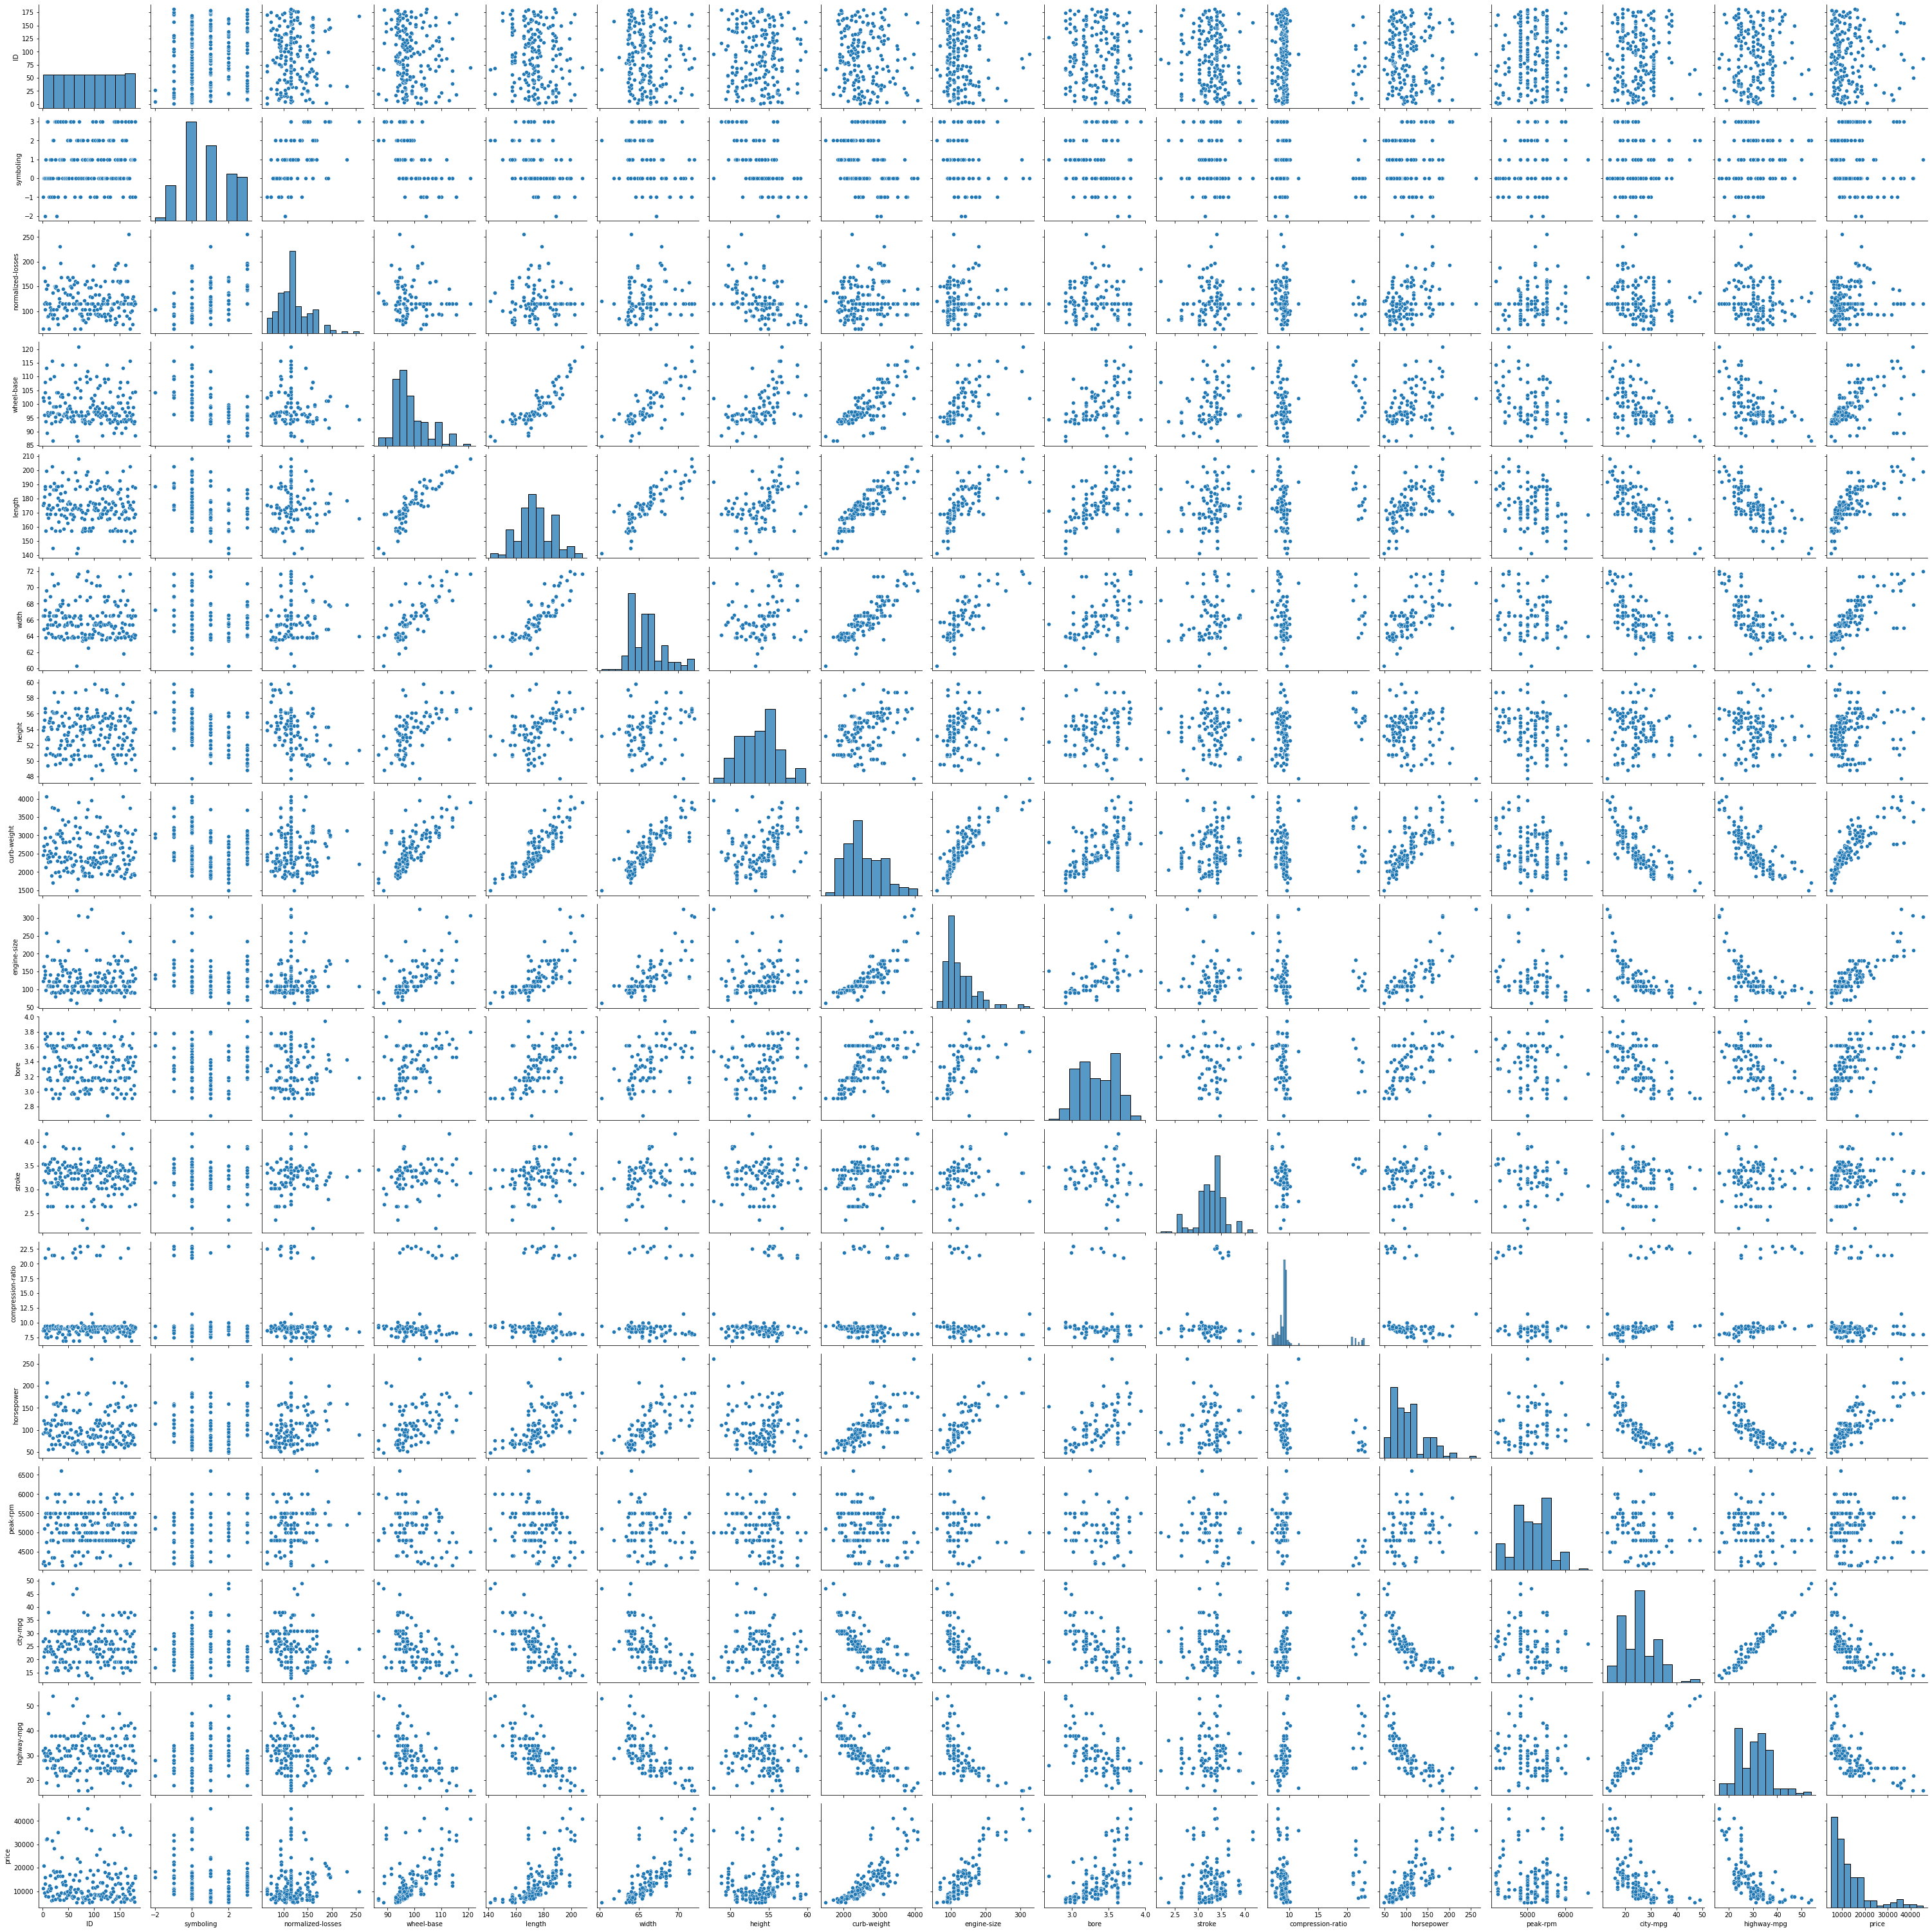

In [170]:
#Understanding the entire train data using a pair plot
plt.figure(figsize=(22,22))
sns.pairplot(train_data)    

Corelation beteween different attribute of data

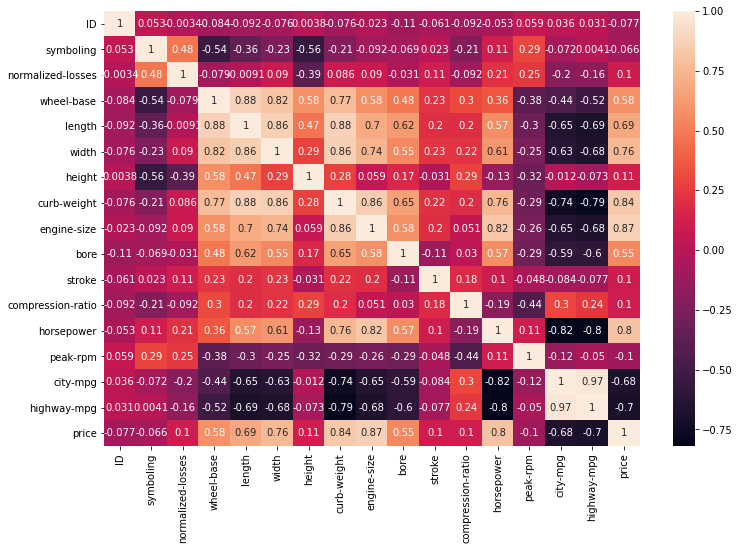

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

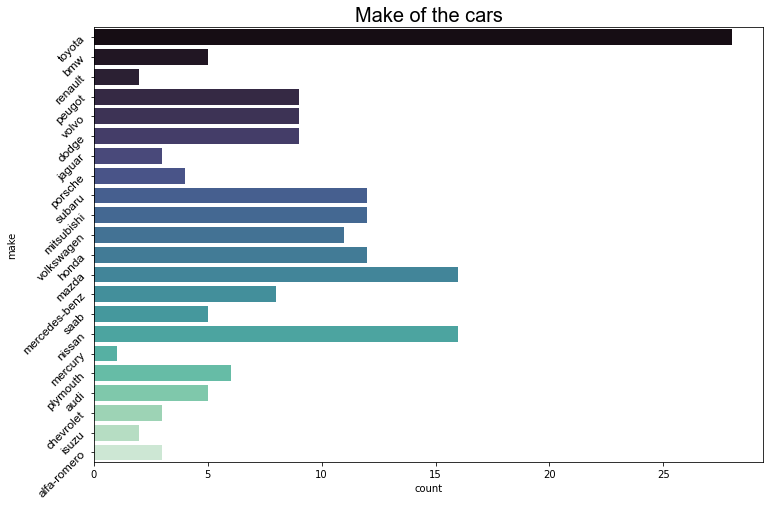

In [72]:
# Distribution of make of the cars
plt.figure(figsize = (12,8))
plt.yticks(rotation = 45, ha = 'right', size = 12, fontfamily = 'Arial')
sns.countplot(y = 'make', data = train_data, palette = "mako")
plt.title("Make of the cars", size = 20, fontfamily = 'Arial')
plt.show()

In [73]:
train_data["make"].value_counts()

toyota           28
nissan           16
mazda            16
subaru           12
mitsubishi       12
honda            12
volkswagen       11
dodge             9
volvo             9
peugot            9
mercedes-benz     8
plymouth          6
bmw               5
saab              5
audi              5
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64

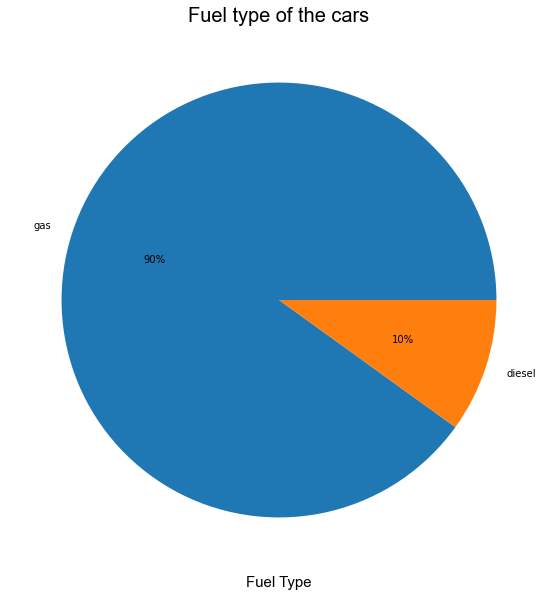

In [74]:
# Distribution of fuel type of the cars
bar, ax = plt.subplots(figsize = (10,10))
ax = plt.pie(x = train_data['fuel-type'].value_counts(),autopct='%.0f%%',
             labels = train_data['fuel-type'].value_counts().index)
plt.title("Fuel type of the cars", size = 20, fontfamily = 'Arial')
plt.xlabel("Fuel Type", size = 15, fontfamily = 'Arial')
plt.show()

In [75]:
train_data["fuel-type"].value_counts()

gas       163
diesel     18
Name: fuel-type, dtype: int64

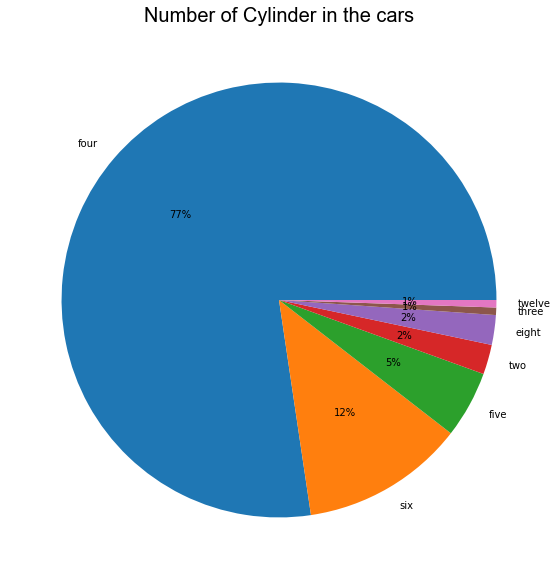

In [76]:
# Distribution of cylinder of the cars
bar, ax = plt.subplots(figsize = (10,10))
ax = plt.pie(x = train_data['num-of-cylinders'].value_counts(),autopct='%.0f%%',
             labels = train_data['num-of-cylinders'].value_counts().index)
plt.title("Number of Cylinder in the cars", size = 20, fontfamily = 'Arial')
plt.xlabel("", size = 15, fontfamily = 'Arial')
plt.show()

In [77]:
train_data["num-of-cylinders"].value_counts()

four      140
six        22
five        9
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

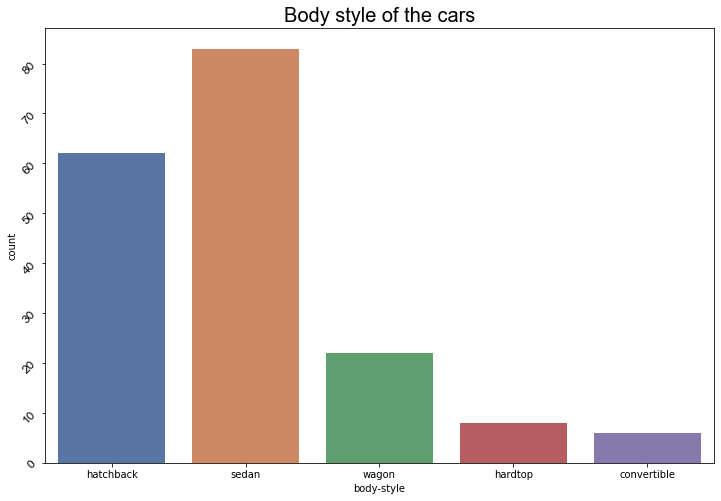

In [88]:
# Distribution of body stype of the cars
plt.figure(figsize = (12,8))
plt.yticks(rotation = 45, ha = 'right', size = 12, fontfamily = 'Arial')
sns.countplot(x = 'body-style', data = train_data, palette = "deep")
plt.title("Body style of the cars", size = 20, fontfamily = 'Arial')
plt.show()

In [79]:
train_data["body-style"].value_counts()

sedan          83
hatchback      62
wagon          22
hardtop         8
convertible     6
Name: body-style, dtype: int64

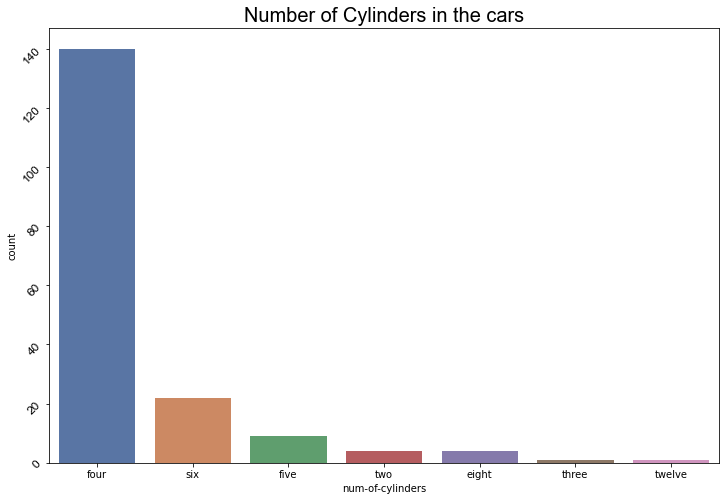

In [80]:
# Distribution of Number of cylinder of the cars
plt.figure(figsize = (12,8))
plt.yticks(rotation = 45, ha = 'right', size = 12, fontfamily = 'Arial')
sns.countplot(x = 'num-of-cylinders', data = train_data, palette = "deep")
plt.title("Number of Cylinders in the cars", size = 20, fontfamily = 'Arial')
plt.show()

In [81]:
train_data["num-of-cylinders"].value_counts()

four      140
six        22
five        9
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

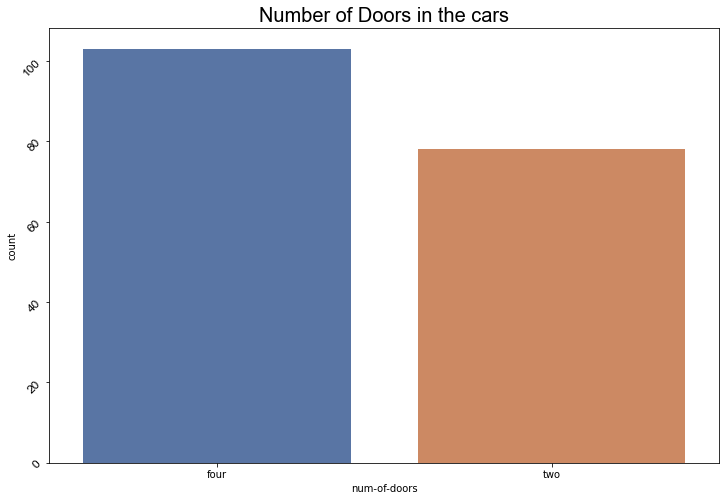

In [93]:
# Distribution of bNumber of doors in the cars
plt.figure(figsize = (12,8))
plt.yticks(rotation = 45, ha = 'right', size = 12, fontfamily = 'Arial')
sns.countplot(x = 'num-of-doors', data = train_data, palette = "deep")
plt.title("Number of Doors in the cars", size = 20, fontfamily = 'Arial')
plt.show()

In [140]:
train_data["num-of-doors"].value_counts()

four    103
two      78
Name: num-of-doors, dtype: int64

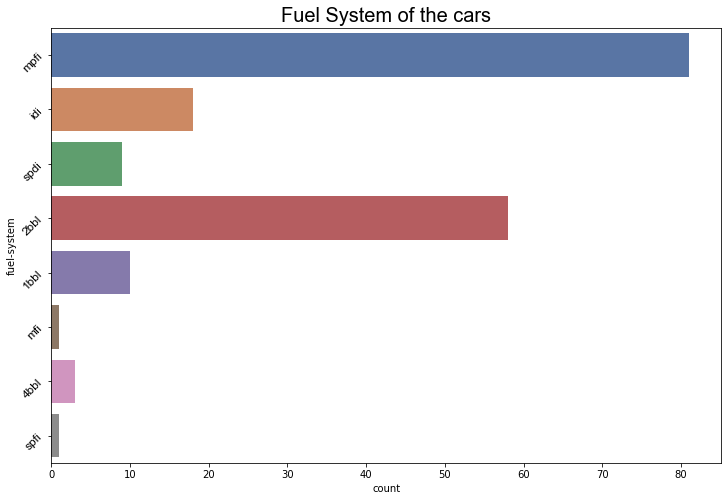

In [84]:
# Distribution of bNumber of doors in the cars
plt.figure(figsize = (12,8))
plt.yticks(rotation = 45, ha = 'right', size = 12, fontfamily = 'Arial')
sns.countplot(y = 'fuel-system', data = train_data, palette = "deep")
plt.title("Fuel System of the cars", size = 20, fontfamily = 'Arial')
plt.show()

In [85]:
train_data["fuel-system"].value_counts()

mpfi    81
2bbl    58
idi     18
1bbl    10
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

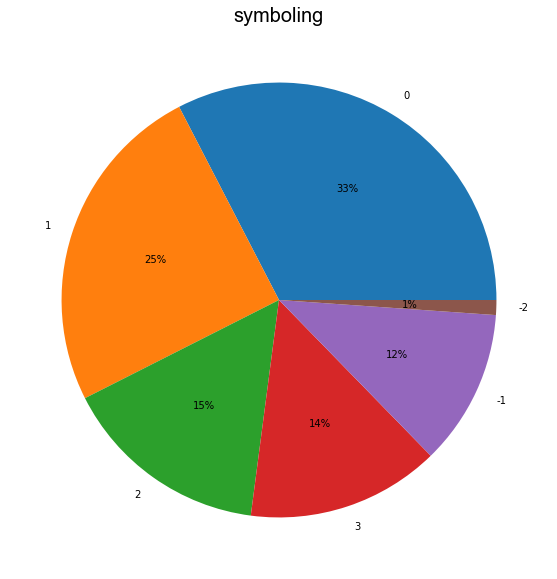

In [86]:
# Distribution of symboling status of the cars
bar, ax = plt.subplots(figsize = (10,10))
ax = plt.pie(x = train_data['symboling'].value_counts(),autopct='%.0f%%',
             labels = train_data['symboling'].value_counts().index)
plt.title("symboling", size = 20, fontfamily = 'Arial')
plt.xlabel("", size = 15, fontfamily = 'Arial')
plt.show()

In [87]:
train_data["symboling"].value_counts()

 0    59
 1    45
 2    28
 3    26
-1    21
-2     2
Name: symboling, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3f8827190>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3f8827850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3f8815dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3f8827f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3f85e32b0>],
 'means': []}

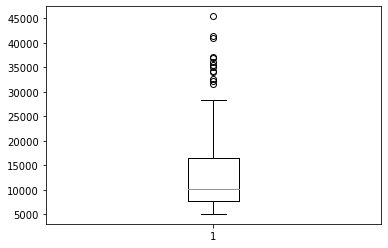

In [29]:
plt.boxplot(train_data['price'])

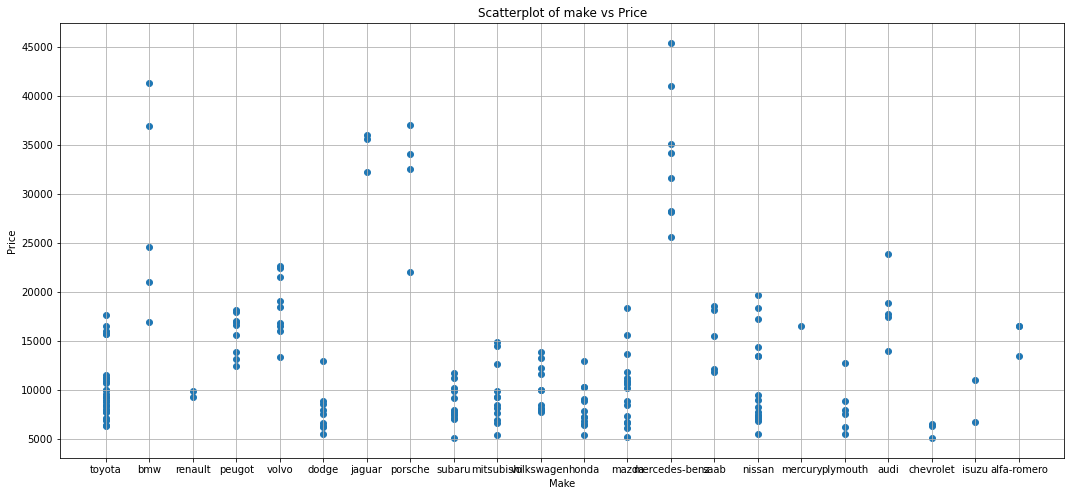

In [94]:
# Predicting price based on engine size
# Known on x and predictable on y
plt.figure(figsize = (18,8))
plt.scatter(train_data['make'], train_data['price'])
plt.title('Scatterplot of make vs Price')
plt.xlabel('Make')
plt.ylabel('Price')
plt.grid()
plt.show()

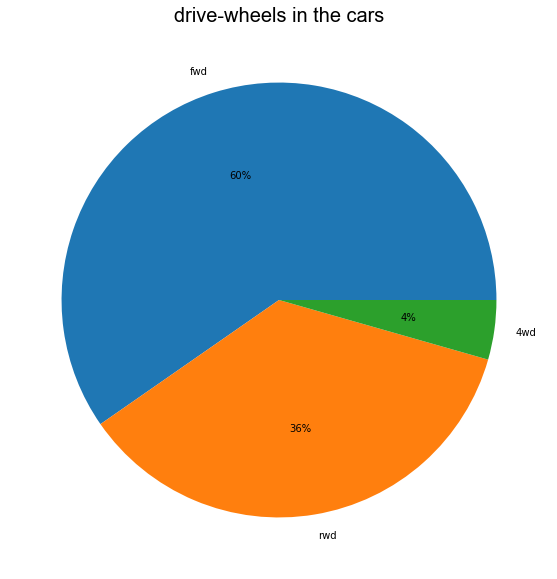

In [95]:
# Distribution of cylinder of the cars
bar, ax = plt.subplots(figsize = (10,10))
ax = plt.pie(x = train_data['drive-wheels'].value_counts(),autopct='%.0f%%',
             labels = train_data['drive-wheels'].value_counts().index)
plt.title("drive-wheels in the cars", size = 20, fontfamily = 'Arial')
plt.xlabel("", size = 15, fontfamily = 'Arial')
plt.show()

In [32]:
train_data.columns

Index(['ID', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [194]:
#Splitting the train data set into training and testing.

X = train_data[['symboling','wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size','bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']]

#X = train_data.drop(labels = ['price'], axis = 1)
y = train_data["price"]

In [195]:
X

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92.0,4200.0,27,32
1,0,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,121.0,4250.0,21,28
2,0,96.1,181.5,66.5,55.2,2579,132,3.46,3.90,8.7,95.0,5100.0,23,31
3,0,107.9,186.7,68.4,56.7,3197,152,3.70,3.52,21.0,95.0,4150.0,28,33
4,-2,104.3,188.8,67.2,56.2,2935,141,3.78,3.15,9.5,114.0,5400.0,24,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32
177,1,93.1,166.8,64.2,54.1,1950,91,3.08,3.15,9.0,68.0,5000.0,31,38
178,1,93.7,157.3,63.8,50.8,1918,90,2.97,3.23,9.4,68.0,5500.0,37,41
179,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27


In [204]:
test_data = test_data[['symboling','wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size','bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']]

In [205]:
test_data.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,-2,104.3,188.8,67.2,56.2,2912,141,3.78,3.15,9.5,114,5400,23,28
1,0,101.2,176.8,64.8,54.3,2765,164,3.31,3.19,9.0,121,4250,21,28
2,-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22
3,1,93.7,167.3,63.8,50.8,1989,90,2.97,3.23,9.4,68,5500,31,38
4,1,94.5,170.2,63.8,53.5,2037,97,3.15,3.29,9.4,69,5200,31,37


In [197]:
#X = pd.get_dummies(data=X, drop_first=True)

In [198]:
X.isnull().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

In [108]:
y

0      11248
1      20970
2       9295
3      13200
4      15985
       ...  
176    10595
177     7395
178     5572
179    16500
180    15750
Name: price, Length: 181, dtype: int64

**Splitting 80/20**

In [206]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

In [207]:
print(X.shape, X_train.shape, X_test.shape)

(181, 14) (144, 14) (37, 14)


In [208]:
#Using Linear Regression
linreg = LinearRegression()

In [209]:
linreg.fit(X_train, y_train) 

LinearRegression()

In [210]:
# Prediction on training data
train_data_predict = linreg.predict(X_train)

In [211]:
#Prediction on testing data
test_data_predict = linreg.predict(X_test)

Text(0, 0.5, 'Predicted Values')

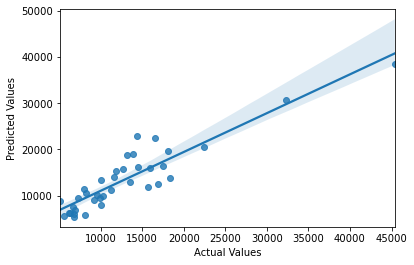

In [212]:
sns.regplot(y_test,test_data_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

**Model Evaluation**


Below are the types of error we will be calculating for our linear regression model:

 - Mean Absolute Error
 - Mean Squared Error
 - Root Mean Squared Error

In [213]:
#Computing MAE
MAE_train = metrics.mean_absolute_error(y_train, train_data_predict)
MAE_test = metrics.mean_absolute_error(y_test, test_data_predict)

In [214]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 2278.3678003807345
MAE for test set is 2343.426915071793


In [215]:
#Computing MSE
MSE_train = metrics.mean_squared_error(y_train, train_data_predict)
MSE_test = metrics.mean_squared_error(y_test, test_data_predict)

In [216]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 10076446.720940607
MSE for test set is 10055446.52240349


In [217]:
#Computing RMSE
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, train_data_predict))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, test_data_predict))

In [218]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 3174.3419351009757
RMSE for test set is 3171.032406394405


In [219]:
#Computing R square
r2_train = metrics.r2_score(y_train,train_data_predict)
r2_test = metrics.r2_score(y_test,test_data_predict)


In [220]:
print("R Squared Value of training set:", r2_train)
print("R Squared Value tesing set:", r2_test)

R Squared Value of training set: 0.849697090447525
R Squared Value tesing set: 0.8283877000133608


In [221]:
prediction = linreg.predict(test_data)

In [222]:
print(prediction)

[16048.44195238 15543.40725117 17787.81898107  5445.95750665
  5765.43606697 10748.76011466 15719.43324552 15100.76703953
  8329.76290552  7341.30663617 19439.8229592   6123.60453815
  5950.86497906  5576.43974093 15124.0480766  26690.2191634
 12172.90136388 18561.34920766 13631.04899035  8264.91798263]


In [226]:
res = pd.DataFrame(prediction)
res.index = test_data.index
res.columns = ["price"]
res.to_csv("used_car_price_prediction_results_zoherbehrainwala@gmail.com.csv", index = False, header = False)

---
<a name = Section9></a>
# **7. Summarization**
---

 - We studied in breifly about the data, its characteristics and its distribution.

 - We investigated about the price of the used car based on their features.

 - The prediction is done based on RMSE value as required.

 - Since the data here is continous the best fit model is Linear Regression model for this dataset.